# CASE

The business wants to predict the number of reviews a store will get using the data provided.

# SOLUTION

The machine learning task described here is a regression task. It involves predicting the continuous variable, number of reviews.

# NOTES

This notebook aims to show the how the various machine learning algorihms can be used in performing regression task. It covers data validation, data cleaning, exploratory data analysis, then preprocessing the data for machine learning modling. While some of the algorithms can handle skewed data, missing data, these were handled before the machine learning task to have a common ground for evaluating the models performance as regard this task. A short description on how each of the model works is also provided as part of the rask in this notebook. 
Mean squared error was used to evaluate each model's performance. The smaller the mean squared value, the more accurate the machine learning model's prediction is.
Feature importance was also gotten for each model. This is especially useful when trying to fine tune performance of a model. When working with really large dataset, containing a lot of columns, this would come in handy in dimensionality reduction. By knowing the columns the model found as most important in making predictions, one can, with the addition of multicolinearity among the feature(columns), and domain knowledge ,know the columns to drop if necessary.
Hyper-parameter tuning was also included in this notebook. Hyper-parameter tuning enables one identify the most appropriate hyperparameter to set the model at for a specific dataset to achieve the best possble model performance. Different models have different hyper-parameters that can be tuned, and these hyper-parameters can be found in the official documentation of the model.

# IMPORT LIBRARIES

In [1]:
import pandas as pd
from datetime import datetime
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import  RandomizedSearchCV 

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler


from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet 

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor

from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostRegressor
 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings('ignore')



# READ DATA

In [2]:
coffee_stores = pd.read_csv(r'C:\Users\USER\Downloads\coffee.csv')
coffee_stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Region           200 non-null    object 
 1   Place name       200 non-null    object 
 2   Place type       200 non-null    object 
 3   Rating           198 non-null    float64
 4   Reviews          198 non-null    float64
 5   Price            200 non-null    object 
 6   Delivery option  200 non-null    bool   
 7   Dine in option   140 non-null    object 
 8   Takeout option   144 non-null    object 
dtypes: bool(1), float64(2), object(6)
memory usage: 12.8+ KB


In [3]:
coffee_stores.head()

,Region,Place name,Place type,Rating,Reviews,Price,Delivery option,Dine in option,Takeout option
0,C,Dim Kavu,Others,4.6,206.0,$$,False,NaN,NaN
1,C,Коферум,Cafe,5.0,24.0,$$,False,NaN,True
2,C,Кофейня Світ Чаю,Coffee shop,5.0,11.0,$$,False,NaN,True
3,C,Кофейня Starcoff,Coffee shop,4.4,331.0,$$,False,True,True
4,C,"Кофейня ""Friend Zone""",Coffee shop,5.0,12.0,$$,False,True,True


# CUSTOM FUNCTIONS

In [4]:
def matching_values(df, column, expected_values: list):
    """ 
    Checks for rows that match expected values for the passed column and returns number of rows with expected values.
    
    Args:
        df : Pandas Dataframe of interest
        column: Column of interest in the pandas Dataframe
        expected_values: a list of values the column should contain
    
    """
    matched_values = df[df[column].isin(expected_values)]
    return f"There are {len(matched_values)} matched values in {column} column out of {len(df)} number of values."


def non_matching_values(df, column, expected_values: list):
    """ 
    Checks for rows that match don't expected values for the passed column and returns number of rows that don't match expected
    values.
    
    Args:
        df : Pandas Dataframe of interest
        column: Column of interest in the pandas Dataframe
        expected_values: a list of values the column should contain
    
    """
    non_matched_values = df[~df[column].isin(expected_values)]
    return f"There are {len(non_matched_values)} unmatched values in {column} column out of {len(df)} number of values."


def nan_checker(dataframe):
    
    """
    Checks for the number of missing values in each column, and returns the number of missimg values in each column.
    
    Args:
        dataframe: Pandas DataFrame of interest
        
    """
    Total = dataframe.isnull().sum().sort_values(ascending = False)
    return Total


def replacements(df, column, replacement):
    """
    This function replaces missing values with specified replacement
    
    Args:
        df: Pandas DataFrame
        column: column of interest in the DataFrame
        replacement: value to replace missing values with
        
    """
    df.loc[df[column].isnull(), column] = replacement
    return df




# EXPLORATORY DATA ANALYSIS AND DATA VALIDATION

In [5]:
# Region column

expected_values = ['A','B','C','D','E','F','G','H','I','J']

matching_values(coffee_stores, 'Region', expected_values)

'There are 200 matched values in Region column out of 200 number of values.'

In [6]:
# Place type column
expected_values = ['Coffee shop','Cafe','Espresso bar','Others']

matching_values(coffee_stores, 'Place type', expected_values)

'There are 200 matched values in Place type column out of 200 number of values.'

In [7]:
#Delivery option column
expected_values = [True, False]

matching_values(coffee_stores, 'Delivery option', expected_values)

'There are 200 matched values in Delivery option column out of 200 number of values.'

In [8]:
#Dine in option column
expected_values = [True, False]

matching_values(coffee_stores, 'Dine in option', expected_values)


'There are 140 matched values in Dine in option column out of 200 number of values.'

In [9]:
#Dine in option column
expected_values = [True, False]

non_matching_values(coffee_stores, 'Dine in option', expected_values)

'There are 60 unmatched values in Dine in option column out of 200 number of values.'

In [10]:
# Check the unique values in Dine in option column
coffee_stores['Dine in option'].unique()

array([nan, True], dtype=object)

In [11]:
#Takeout option column
expected_values = [True, False]

matching_values(coffee_stores, 'Takeout option', expected_values)

'There are 144 matched values in Takeout option column out of 200 number of values.'

In [12]:
#Takeout option column
expected_values = [True, False]

non_matching_values(coffee_stores, 'Takeout option', expected_values)

'There are 56 unmatched values in Takeout option column out of 200 number of values.'

In [13]:
# Check the unique values in Takeout option column
coffee_stores['Takeout option'].unique()

array([nan, True], dtype=object)

In [14]:
#Rating column -- check for out of rating values
out_of_scale_value = coffee_stores[coffee_stores['Rating'] > 5]

print(f"Value of rating that is out of scale is {out_of_scale_value}")

Value of rating that is out of scale is Empty DataFrame
Columns: [Region, Place name, Place type, Rating, Reviews, Price, Delivery option, Dine in option, Takeout option]
Index: []


In [15]:
#Price column-- Check for price that don't start with either '$' or '$$' or '$$$'

correct_price = coffee_stores['Price'].str.startswith(r'$+')

incorrect_price = coffee_stores[~coffee_stores[correct_price]]
incorrect_price

,Region,Place name,Place type,Rating,Reviews,Price,Delivery option,Dine in option,Takeout option
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
195,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
196,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
197,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
198,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
nan_checker(coffee_stores)

Dine in option     60
Takeout option     56
Rating              2
Reviews             2
Region              0
Place name          0
Place type          0
Price               0
Delivery option     0
dtype: int64

# SUMMARY OF FINDINGS

Region: All the values match the expected values for this column
   
Place type: All the values match the expected values for this column.

Rating: All values in this column fall within expected range of 0-5.

Price: All the values match the expected values for this column.

Delivery option: All the values match the expected values for this column.

Dine in option: Not all the values match the expected values for this column.

Takeout option: Not all the values match the expected values for this column.


Dine in option: There 60 missing values

Takeout option: There are 56 missing values

Rating: There are 2 missig values

Reviews: There 2 missing values

columns Place name, Place type, Price, Deliery option have no missing values



# DATA CLEANING, MANIPULATION AND WRANGLING

In [17]:
# Dine in option column

replacements(coffee_stores, 'Dine in option', False)

,Region,Place name,Place type,Rating,Reviews,Price,Delivery option,Dine in option,Takeout option
0,C,Dim Kavu,Others,4.6,206.0,$$,False,False,NaN
1,C,Коферум,Cafe,5.0,24.0,$$,False,False,True
2,C,Кофейня Світ Чаю,Coffee shop,5.0,11.0,$$,False,False,True
3,C,Кофейня Starcoff,Coffee shop,4.4,331.0,$$,False,True,True
4,C,"Кофейня ""Friend Zone""",Coffee shop,5.0,12.0,$$,False,True,True
...,...,...,...,...,...,...,...,...,...
195,H,Artist,Others,4.6,963.0,$$$,False,True,True
196,H,Dream Cafe,Cafe,4.3,646.0,$$,False,True,True
197,H,РУТА КАФЕ ПП КУЛІЧЕНКО К.І.,Cafe,4.6,16.0,$$,False,True,True
198,H,Ob'yektna Kava,Coffee shop,4.7,599.0,$$,False,True,True


In [18]:
# Takeout option column

replacements(coffee_stores, 'Takeout option', False)

,Region,Place name,Place type,Rating,Reviews,Price,Delivery option,Dine in option,Takeout option
0,C,Dim Kavu,Others,4.6,206.0,$$,False,False,False
1,C,Коферум,Cafe,5.0,24.0,$$,False,False,True
2,C,Кофейня Світ Чаю,Coffee shop,5.0,11.0,$$,False,False,True
3,C,Кофейня Starcoff,Coffee shop,4.4,331.0,$$,False,True,True
4,C,"Кофейня ""Friend Zone""",Coffee shop,5.0,12.0,$$,False,True,True
...,...,...,...,...,...,...,...,...,...
195,H,Artist,Others,4.6,963.0,$$$,False,True,True
196,H,Dream Cafe,Cafe,4.3,646.0,$$,False,True,True
197,H,РУТА КАФЕ ПП КУЛІЧЕНКО К.І.,Cafe,4.6,16.0,$$,False,True,True
198,H,Ob'yektna Kava,Coffee shop,4.7,599.0,$$,False,True,True


In [19]:
# Rating column

replacements(coffee_stores, 'Rating', 0)

,Region,Place name,Place type,Rating,Reviews,Price,Delivery option,Dine in option,Takeout option
0,C,Dim Kavu,Others,4.6,206.0,$$,False,False,False
1,C,Коферум,Cafe,5.0,24.0,$$,False,False,True
2,C,Кофейня Світ Чаю,Coffee shop,5.0,11.0,$$,False,False,True
3,C,Кофейня Starcoff,Coffee shop,4.4,331.0,$$,False,True,True
4,C,"Кофейня ""Friend Zone""",Coffee shop,5.0,12.0,$$,False,True,True
...,...,...,...,...,...,...,...,...,...
195,H,Artist,Others,4.6,963.0,$$$,False,True,True
196,H,Dream Cafe,Cafe,4.3,646.0,$$,False,True,True
197,H,РУТА КАФЕ ПП КУЛІЧЕНКО К.І.,Cafe,4.6,16.0,$$,False,True,True
198,H,Ob'yektna Kava,Coffee shop,4.7,599.0,$$,False,True,True


In [20]:
# Reviews column

replacements(coffee_stores, 'Reviews', 0)

,Region,Place name,Place type,Rating,Reviews,Price,Delivery option,Dine in option,Takeout option
0,C,Dim Kavu,Others,4.6,206.0,$$,False,False,False
1,C,Коферум,Cafe,5.0,24.0,$$,False,False,True
2,C,Кофейня Світ Чаю,Coffee shop,5.0,11.0,$$,False,False,True
3,C,Кофейня Starcoff,Coffee shop,4.4,331.0,$$,False,True,True
4,C,"Кофейня ""Friend Zone""",Coffee shop,5.0,12.0,$$,False,True,True
...,...,...,...,...,...,...,...,...,...
195,H,Artist,Others,4.6,963.0,$$$,False,True,True
196,H,Dream Cafe,Cafe,4.3,646.0,$$,False,True,True
197,H,РУТА КАФЕ ПП КУЛІЧЕНКО К.І.,Cafe,4.6,16.0,$$,False,True,True
198,H,Ob'yektna Kava,Coffee shop,4.7,599.0,$$,False,True,True


# VALIDATE THAT ALL CHANGES HAVE BEEN ENFORCED

In [21]:
nan_checker(coffee_stores)

Region             0
Place name         0
Place type         0
Rating             0
Reviews            0
Price              0
Delivery option    0
Dine in option     0
Takeout option     0
dtype: int64

# COMMENTS:

Dine in option: Missing values were replaced with False

Takeout option: Missing values were replaced with False

Rating : Missing values were replaced with 0 

Reviews: Missing values were replaced with 0 


# VISUALIZATIONS / FINDINGS

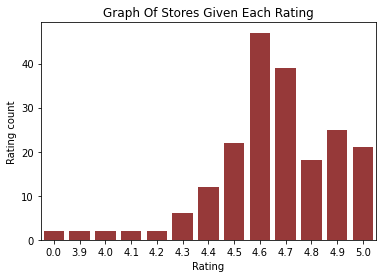

In [22]:
ratings_sorted = sorted(coffee_stores['Rating'].unique())
sns.countplot(data = coffee_stores, x = 'Rating', order = ratings_sorted, color = 'brown')
plt.xlabel('Rating')
plt.ylabel('Rating count')
plt.title('Graph Of Stores Given Each Rating')
plt.show()

# COMMENTS:

The category of variable rating that has the most observation is 4.6

From the bars in the chart, it is observed that the observations(that is, the rating count) is not balanced across each category.


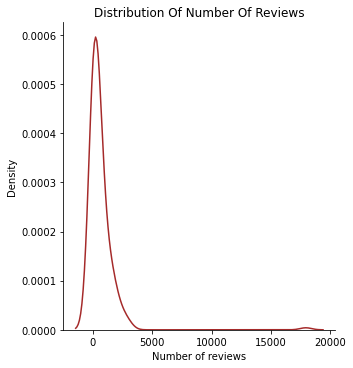

In [23]:
sns.displot(data = coffee_stores, x = 'Reviews', kind = 'kde', color = 'brown')
plt.xlabel('Number of reviews')
plt.title('Distribution Of Number Of Reviews')
plt.show()

# COMMENT:

The distribution of the number of reviews is right skewed(positive skew). It has the outliers on the right-side of the distribution.

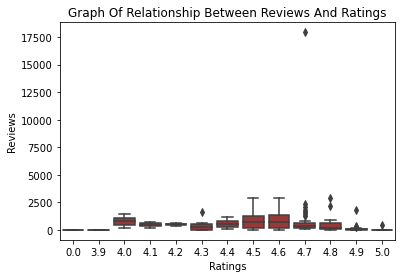

In [24]:
sns.boxplot(data = coffee_stores, x = 'Rating', y = 'Reviews', color = 'brown')
plt.xlabel('Ratings')
plt.ylabel('Reviews')
plt.title('Graph Of Relationship Between Reviews And Ratings')
plt.show()

# COMMENT:

There is an outlier, a review count of 17500, which is preventing us from properly interpreting the relatinship. This outlier will be removed, and the data visualized again.


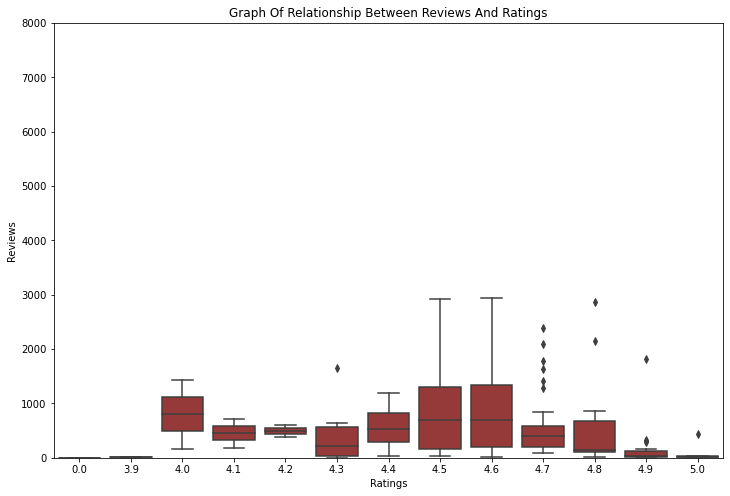

In [25]:
plt.figure(figsize = (12, 8))
sns.boxplot(data = coffee_stores, x = 'Rating', y = 'Reviews', color = 'brown')
plt.xlabel('Ratings')
plt.ylabel('Reviews')
plt.ylim(0, 8000)
plt.title('Graph Of Relationship Between Reviews And Ratings')
plt.show()

# COMMENT:

After excluding the outliers from the plot, it can be observed that the number of reviews has the highest range at ratings 4.5 and 4.6

# MACHINE LEARNING TASKS

Machine Learning pre-processing steps for this data:

1. Split data into train and test
    
2. The outlier, where review is 17500, will be removed

3. Log transformation of the Reviews column -- reason being that linear regression will be part of the models used, and it assumes normal distribution. Reviews column being right-skewed does not conform to this, hence it will log transformed.

4. Place name column will be dropped because it does not add any valuable information to this task

5. Region, Place type, Price will be encoded to numerics  

6. Split each into feature and target

7. convert to 2-dimensional numpy array.





In [26]:
# 1.
train_data, test_data = train_test_split(coffee_stores, test_size = 0.2, random_state = 42)

In [27]:
#train data and teest data for catboost and lightgbm models-- no encoding of categorical variables

train_data_c = train_data.copy()
test_data_c = test_data.copy()

In [28]:
# 2.
train_data = train_data[train_data['Reviews'] != 17500]

#reset index to ensure continuous row index
train_data = train_data.reset_index(drop = True )

test_data = test_data[test_data['Reviews'] != 17500]

#reset index to ensure continuous row index
test_data = test_data.reset_index(drop = True )



In [29]:
# 3.

train_data['Log_reviews'] = np.log(train_data['Reviews'] + 1) #adding 1 to avoid log 0

test_data['Log_reviews'] = np.log(test_data['Reviews'] + 1) #adding 1 to avoid log 0

In [30]:
# 4.
train_data.drop('Place name', axis = 1, inplace = True)
test_data.drop('Place name', axis = 1, inplace = True)

In [31]:
# 5.
train_data['Price'].replace({'$':1, '$$':2, '$$$':3}, inplace = True)
train_data['Place type'].replace({'Coffee shop': 1, 'Cafe': 2, 'Espresso bar': 3, 'Others': 4}, inplace = True)
train_data['Region'].replace({'A': 1,'B': 2,'C': 3,'D': 4,'E': 5,'F': 6,'G': 7,'H': 8,'I': 9,'J': 0}, inplace = True)
train_data['Dine in option'].replace({'True': 1, 'False': 0}, inplace = True)
train_data['Takeout option'].replace({'True': 1, 'False': 0}, inplace = True)
train_data['Delivery option'].replace({'True': 1, 'False': 0}, inplace = True)

test_data['Price'].replace({'$':1, '$$':2, '$$$':3}, inplace = True)
test_data['Place type'].replace({'Coffee shop': 1, 'Cafe': 2, 'Espresso bar': 3, 'Others': 4}, inplace = True)
test_data['Region'].replace({'A': 1,'B': 2,'C': 3,'D': 4,'E': 5,'F': 6,'G': 7,'H': 8,'I': 9,'J': 0}, inplace = True)
test_data['Dine in option'].replace({'True': 1, 'False': 0}, inplace = True)
test_data['Takeout option'].replace({'True': 1, 'False': 0}, inplace = True)
test_data['Delivery option'].replace({'True': 1, 'False': 0}, inplace = True)



In [32]:
# 6. and 7.
y_train = np.array(train_data['Log_reviews']).reshape(-1, 1)
X_train = train_data.drop(['Reviews', 'Log_reviews'], axis = 1)

y_test = np.array(test_data['Log_reviews']).reshape(-1, 1)
X_test = test_data.drop(['Reviews', 'Log_reviews'], axis = 1)


Machine learning model steps

1. Train models and make predictions

2. Evaluate models performance

3. Get feature importance

# LINEAR REGRESSION

Conditions for using linear regression model:
There must be a linear relationship between the dependent and the independent variables
The dataset must be homoscedastic
There shuld be no co-linearity between the independent variables


In [33]:
#1. 

#instantiate the model
lr = LinearRegression()
#train the model and make predictions
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)


In [34]:
# 2. 

mse_lr = mean_squared_error(y_test, y_pred_lr)

#validate the mean squared error of the model
mse_scores_lr = -cross_val_score(lr, X_train, y_train, scoring = 'neg_mean_squared_error', cv = 5)
mean_mse_scores_lr = mse_scores_lr.mean()
std_mse_scores_lr = mse_scores_lr.std()

#print results
print(f"The mean squared error gotten after evaluating model's performance is {mse_lr}")
print(f"The mean of mean squared errors gotten after performing the 5 fold cross validation is {mean_mse_scores_lr}")
print(f"The standard deviation from the mean {mean_mse_scores_lr} is {std_mse_scores_lr}")



The mean squared error gotten after evaluating model's performance is 1.8982499793507206
The mean of mean squared errors gotten after performing the 5 fold cross validation is 3.1961259199582708
The standard deviation from the mean 3.1961259199582708 is 2.4165988784018815


# REGULARIZED LINEAR REGRESSION MODELS
                     LASSO , RIDGE, ELASTICNET

Regularized regression is a regression method with an additional constraint.This constraint is put in place to handle a large number of independent variable(a.k.a. predictor). It implements this by placing a larger penalty on unimportant features, thus shrinking their coefficients towards zero. 
Why is regularization important? It is important because it is used to calibrate machine learning models in order to prevent over-fitting or under-fitting, hence reducing errors in prediction.


# LASSO REGRESSION

In [35]:
# 1. 
#instantiate the model
alpha = 1.0 #you can adjust this value. It's responsible regularization
ls = Lasso(alpha = alpha)
#train the model and make predictions
ls.fit(X_train, y_train)
y_pred_ls = ls.predict(X_test)



In [36]:
# 2.

mse_ls = mean_squared_error(y_test, y_pred_ls)

#validate the mean squared error of the model
mse_scores_ls = -cross_val_score(ls, X_train, y_train, scoring = 'neg_mean_squared_error', cv = 5)
mean_mse_scores_ls = mse_scores_ls.mean()
std_mse_scores_ls = mse_scores_ls.std()

#print results
print(f"The mean squared error gotten after evaluating model's performance is {mse_ls}")
print(f"The mean of mean squared errors gotten after performing the 5 fold cross validation is {mean_mse_scores_ls}")
print(f"The standard deviation from the mean {mean_mse_scores_ls} is {std_mse_scores_ls}")



The mean squared error gotten after evaluating model's performance is 3.076846395129914
The mean of mean squared errors gotten after performing the 5 fold cross validation is 2.9149520264699498
The standard deviation from the mean 2.9149520264699498 is 0.3563346531448747


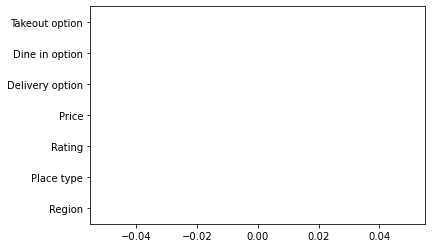

In [37]:
# 3. 

ls.coef_

#converting to pandas series to visualize
Feat_importance=pd.Series(ls.coef_ , index = X_train.columns)
Feat_importance.plot(kind = 'barh', color = 'indianred')
plt.show()

In [38]:
# Reducing alpha value

# 1. 
#instantiate the model
alpha = 0.01 #you can adjust this value. It's responsible regularization
ls = Lasso(alpha = alpha)
#train the model and make predictions
ls.fit(X_train, y_train)
y_pred_ls = ls.predict(X_test)



In [39]:
# 2.

mse_ls = mean_squared_error(y_test, y_pred_ls)

#validate the mean squared error of the model
mse_scores_ls = -cross_val_score(ls, X_train, y_train, scoring = 'neg_mean_squared_error', cv = 5)
mean_mse_scores_ls = mse_scores_ls.mean()
std_mse_scores_ls = mse_scores_ls.std()

#print results
print(f"The mean squared error gotten after evaluating model's performance is {mse_ls}")
print(f"The mean of mean squared errors gotten after performing the 5 fold cross validation is {mean_mse_scores_ls}")
print(f"The standard deviation from the mean {mean_mse_scores_ls} is {std_mse_scores_ls}")



The mean squared error gotten after evaluating model's performance is 1.915673418967253
The mean of mean squared errors gotten after performing the 5 fold cross validation is 3.0124103196689123
The standard deviation from the mean 3.0124103196689123 is 2.108086554967498


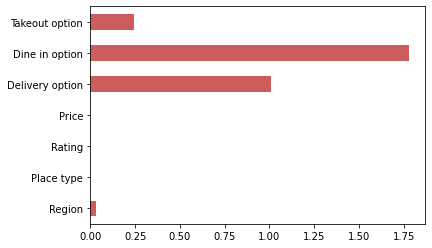

In [40]:
# 3. 

ls.coef_

#converting to pandas series to visualize
Feat_importance=pd.Series(ls.coef_ , index = X_train.columns)
Feat_importance.plot(kind = 'barh', color = 'indianred')
plt.show()

# Comment:
The alpha parameter is responding for controlling the strength of penalization given by the model on each feature. A higher alpha will lead to more coefficients being set to zero, hence the empty barplot when alpha was set to 1.0

# Ridge

In [41]:
# 1.

#instantiate the model
alpha = 1.0 #you can adjust this value. It's responsible regularization
ridge = Ridge(alpha = alpha)
#train the model and make predictions
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)



In [42]:
# 2.

mse_ridge = mean_squared_error(y_test, y_pred_ridge)

#validate the mean squared error of the model
mse_scores_ridge = -cross_val_score(ridge, X_train, y_train, scoring = 'neg_mean_squared_error', cv = 5)
mean_mse_scores_ridge = mse_scores_ridge.mean()
std_mse_scores_ridge = mse_scores_ridge.std()

#print results
print(f"The mean squared error gotten after evaluating model's performance is {mse_ridge}")
print(f"The mean of mean squared errors gotten after performing the 5 fold cross validation is {mean_mse_scores_ridge}")
print(f"The standard deviation from the mean {mean_mse_scores_ls} is {std_mse_scores_ridge}")



The mean squared error gotten after evaluating model's performance is 1.8975794828950932
The mean of mean squared errors gotten after performing the 5 fold cross validation is 2.9600479025273683
The standard deviation from the mean 3.0124103196689123 is 1.9613332643478556


# ElasticNet 



In [43]:
# 1. 

#instantiate the model
alpha = 0.01 #you can adjust this value. It's responsible regularization
l1_ratio = 0.5 #you can adjust this needed
EN = ElasticNet(alpha = alpha, l1_ratio = l1_ratio)
#train the model and make predictions
EN.fit(X_train, y_train)
y_pred_EN = ridge.predict(X_test)



In [44]:
# 2. 

mse_EN = mean_squared_error(y_test, y_pred_EN)

#validate the mean squared error of the model
mse_scores_EN = -cross_val_score(EN, X_train, y_train, scoring = 'neg_mean_squared_error', cv = 5)
mean_mse_scores_EN = mse_scores_EN.mean()
std_mse_scores_EN = mse_scores_EN.std()

#print results
print(f"The mean squared error gotten after evaluating model's performance is {mse_EN}")
print(f"The mean of mean squared errors gotten after performing the 5 fold cross validation is {mean_mse_scores_EN}")
print(f"The standard deviation from the mean {mean_mse_scores_ls} is {std_mse_scores_EN}")



The mean squared error gotten after evaluating model's performance is 1.8975794828950932
The mean of mean squared errors gotten after performing the 5 fold cross validation is 2.953222358399844
The standard deviation from the mean 3.0124103196689123 is 1.9715747285848706


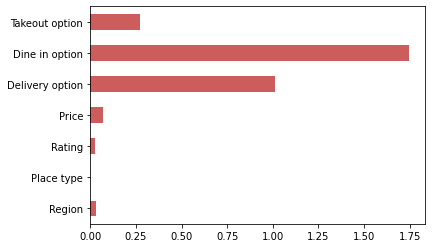

In [45]:
# 3.

EN.coef_

#converting to pandas series to visualize
Feat_importance=pd.Series(EN.coef_ , index = X_train.columns)
Feat_importance.plot(kind = 'barh', color = 'indianred')
plt.show()

# DecisionTreeRegressor


Simple to understand. 
Simple to interpret. 
Easy to use
Flexibible: ability to learn/ understand non-linear dependencies between features and labels
(notes: non-linear dependencies is a situation where there is no straight line or no direct relationship between an independent variable and a dependent variable. In a non-linear relationship, changes in the output do not change in direct proportion to changes in any of the inputs)
Preprocessing: you don’t need a lot of feature preprocessing(e.g. no need to standardize or normalize) to train a Decision Tree, in contrast to the linear regression models.

--Limitations
Decision Trees suffer from high variance when they are trained without constraints,leading to over-fitting of the training set. Hence the need for pruning. Hyper-parameter tuning can help.
Decision Trees are very sensitive to small variations in training set. Sometimes, when a single point is removed from the training set, Decision Tree learn parameter may change drastically .

To solve this, ensemble models can be used. It takes advantage of the flexibitlity of Decision Trees while reducing the tendencies to memorize noise. 


In [46]:
# 1.

# Instantiate DecisionTreeRegressor
dt = DecisionTreeRegressor(random_state = 42)

#Train the model and make predictions
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)



In [47]:
# 2. 

mse_dt = mean_squared_error(y_test, y_pred_dt)

#validate the mean squared error of the model
mse_scores_dt = -cross_val_score(dt, X_train, y_train, scoring = 'neg_mean_squared_error', cv = 5)
mean_mse_scores_dt = mse_scores_dt.mean()
std_mse_scores_dt = mse_scores_dt.std()

#print results
print(f"The mean squared error gotten after evaluating model's performance is {mse_dt}")
print(f"The mean of mean squared errors gotten after performing the 5 fold cross validation is {mean_mse_scores_dt}")
print(f"The standard deviation from the mean {mean_mse_scores_dt} is {std_mse_scores_dt}")



The mean squared error gotten after evaluating model's performance is 1.4757159800441801
The mean of mean squared errors gotten after performing the 5 fold cross validation is 2.387117300021836
The standard deviation from the mean 2.387117300021836 is 0.38012384945797145


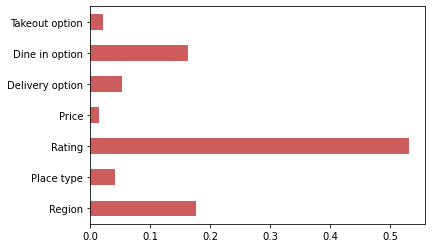

In [48]:
# 3.

dt.feature_importances_

#converting to pandas series to visualize
Feat_importance=pd.Series(dt.feature_importances_ , index = X_train.columns)
Feat_importance.plot(kind = 'barh', color = 'indianred')
plt.show()

# Regularization

In [49]:
# Instantiate DecisionTreeRegressor
dt = DecisionTreeRegressor(random_state = 42)

# Hyper-parameters to search
hyperparam_grid = {'max_depth': [2, 5, 10, 15, 20],
                  'min_samples_split': [2, 4, 6, 8],
                  'criterion': ['squared_error', 'absolute_error', 'friedman_mse']}

#Perform randomized search on the data with cross validation
random_searchcv = RandomizedSearchCV(dt, hyperparam_grid, cv = 5, scoring = 'neg_mean_squared_error', random_state = 42)
random_searchcv.fit(X_train, y_train)

#identify the best hyperparameters found after the randomized grid search
best_parameters = random_searchcv.best_params_

# use the best hyperparameter retrieved to train the model
dt_pruned = random_searchcv.best_estimator_

#Make prediction
y_prediction_dt_pruned = dt_pruned.predict(X_test)

#Evaluate model performance
mse_dt_pruned = mean_squared_error(y_test, y_prediction_dt_pruned)


#print results
print(f"The best hyper-parameters for this data is {best_parameters}")
print(f"The mean squared error gotten after evaluating model's performance is {mse_dt_pruned}")

The best hyper-parameters for this data is {'min_samples_split': 2, 'max_depth': 2, 'criterion': 'squared_error'}
The mean squared error gotten after evaluating model's performance is 1.6718532808639712


# ENSEMBLE MODELS
 Some common ensemble learning techniques include:
Bagging -- stands for Bootstrapping Aggregation. Task is performed in two steps:  bootstrapping, a sampling technique to select samples with replacement for the base models to train on. Aggregation, the step involving combination of the predictions of all base models. Example is BaggingRegressor, Random Forest(samples data to train base estimators on, without replacement. Also, base estimators can only be Decision Trees

Boosting -- This ensemble learning technique enables each member to learn from the preceding member’s mistakes, thereby ensuring that  better predictions are made. Unlike the bagging method, in boosting, all base learners(weak) are arranged in a sequential format so that they can learn from the mistakes of their preceding learner. Examples include; Adaboost, Gradient Boost, Stochastic GradientBoost, LightGradientBoost, CatBoost

Stacking -- In stacking, an algorithm, meta model, takes the outputs of sub-models as input and attempts to learn how to best combine the input predictions to make a better output predictions.Stacking is also known as a stacked generalization. Example, VotingRegressor and VotingClasifier.


*Stacking will be covered in the next repo I create 


# RandomForestRegressor


In [50]:
# 1. 
# instantiate model
rf = RandomForestRegressor(random_state = 42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)


In [51]:
# 2.

mse_rf = mean_squared_error(y_test, y_pred_rf)

#validate the mean squared error of the model
mse_scores_rf = -cross_val_score(rf, X_train, y_train, scoring = 'neg_mean_squared_error', cv = 5)
mean_mse_scores_rf = mse_scores_rf.mean()
std_mse_scores_rf = mse_scores_rf.std()

#print results
print(f"The mean squared error gotten after evaluating model's performance is {mse_rf}")
print(f"The mean of mean squared errors gotten after performing the 5 fold cross validation is {mean_mse_scores_rf}")
print(f"The standard deviation from the mean {mean_mse_scores_rf} is {std_mse_scores_rf}")



The mean squared error gotten after evaluating model's performance is 1.1061555919000048
The mean of mean squared errors gotten after performing the 5 fold cross validation is 1.3957754843260708
The standard deviation from the mean 1.3957754843260708 is 0.29577885700594664


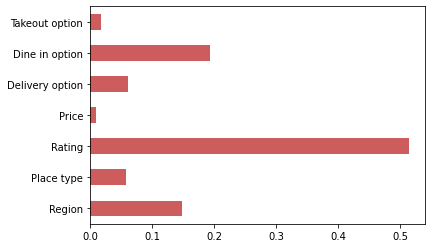

In [52]:
# 3.

rf.feature_importances_

#converting to pandas series to visualize
Feat_importance=pd.Series(rf.feature_importances_ , index = X_train.columns)
Feat_importance.plot(kind = 'barh', color = 'indianred')
plt.show()

# Regularization

In [53]:
# Instantiate RandomForestRegressor
rf = RandomForestRegressor(random_state = 42)

# Hyper-parameters to search
hyperparam_grid = {'n_estimators':[10,50,100,200],
                   'max_depth': [None, 2, 5, 10, 15, 20],
                  'min_samples_split': [2, 4, 6, 8, 10],
                  'criterion': ['squared_error', 'absolute_error', 'friedman_mse']}

#Perform randomized search on the data with cross validation
random_searchcv = RandomizedSearchCV(rf, hyperparam_grid, cv = 5, scoring = 'neg_mean_squared_error', random_state = 42)
random_searchcv.fit(X_train, y_train)

#identify the best hyperparameters found after the randomized grid search
best_parameters = random_searchcv.best_params_

# use the best hyperparameter retrieved to train the model
rf_pruned = random_searchcv.best_estimator_

#Make prediction
y_prediction_rf_pruned = rf_pruned.predict(X_test)

#Evaluate model performance
mse_rf_pruned = mean_squared_error(y_test, y_prediction_rf_pruned)


#print results
print(f"The best hyper-parameters for this data is {best_parameters}")
print(f"The mean squared error gotten after evaluating model's performance is {mse_rf_pruned}")

The best hyper-parameters for this data is {'n_estimators': 200, 'min_samples_split': 8, 'max_depth': None, 'criterion': 'squared_error'}
The mean squared error gotten after evaluating model's performance is 1.162839070247383


# BaggingRegressor



In [54]:
#1. 

# instantiate model

#base_estimator = DecisionTreeRegressor()
br = BaggingRegressor(oob_score = True, random_state = 42)
br.fit(X_train, y_train)
y_pred_br = br.predict(X_test)


In [55]:
#2.

mse_br = mean_squared_error(y_test, y_pred_br)

#validate the mean squared error of the model
mse_scores_br = -cross_val_score(br, X_train, y_train, scoring = 'neg_mean_squared_error', cv = 5)
mean_mse_scores_br = mse_scores_br.mean()
std_mse_scores_br = mse_scores_br.std()

#print results
print(f"The mean squared error gotten after evaluating model's performance is {mse_br}")
print(f"The mean of mean squared errors gotten after performing the 5 fold cross validation is {mean_mse_scores_br}")
print(f"The standard deviation from the mean {mean_mse_scores_ls} is {std_mse_scores_br}")



The mean squared error gotten after evaluating model's performance is 1.2207379330243004
The mean of mean squared errors gotten after performing the 5 fold cross validation is 1.7028902600963853
The standard deviation from the mean 3.0124103196689123 is 0.5179812214814066


In [56]:
# OOB 

br.oob_score_

0.48332502095651364

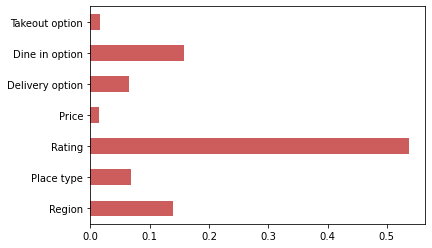

In [57]:
# 3.

#br.feature_importances_
feature_importances = np.mean([tree.feature_importances_ for tree in br.estimators_], axis = 0)
#converting to pandas series to visualize
Feat_importance=pd.Series(feature_importances , index = X_train.columns)
Feat_importance.plot(kind = 'barh', color = 'indianred')
plt.show()

# Regularization

In [58]:
# Instantiate DecisionTreeRegressor
base_estimator = DecisionTreeRegressor()
br = BaggingRegressor(base_estimator = base_estimator, oob_score = True, random_state = 42)

#continue here ##
# Hyper-parameters to search
hyperparam_grid = {'n_estimators':[10, 50, 200, 500],
                   'base_estimator__max_depth': [None,2, 5, 10, 15, 20],
                   'max_samples':[0.5, 0.7, 1.0],#fraction of samples to use for each base estimator
                   'bootstrap_features': [False, True], #whether to bootstrap features
                  }

#Perform randomized search on the data with cross validation
random_searchcv = RandomizedSearchCV(br, hyperparam_grid, cv = 5, scoring = 'neg_mean_squared_error', random_state = 42)
random_searchcv.fit(X_train, y_train)

#identify the best hyperparameters found after the randomized grid search
best_parameters = random_searchcv.best_params_

# use the best hyperparameter retrieved to train the model
br_pruned = random_searchcv.best_estimator_

#Make prediction
y_prediction_br_pruned = br_pruned.predict(X_test)

#Evaluate model performance
mse_br_pruned = mean_squared_error(y_test, y_prediction_br_pruned)


#print results
print(f"The best hyper-parameters for this data is {best_parameters}")
print(f"The mean squared error gotten after evaluating model's performance is {mse_br_pruned}")

The best hyper-parameters for this data is {'n_estimators': 50, 'max_samples': 0.5, 'bootstrap_features': False, 'base_estimator__max_depth': 15}
The mean squared error gotten after evaluating model's performance is 1.211297286114222


# AdaBoostRegressor


In [59]:
#1.

# instantiate model

base_estimator = DecisionTreeRegressor()
abr = AdaBoostRegressor(base_estimator = base_estimator, random_state = 42)
abr.fit(X_train, y_train)
y_pred_abr = abr.predict(X_test)


In [60]:
# 2.

mse_abr = mean_squared_error(y_test, y_pred_abr)

#validate the mean squared error of the model
mse_scores_abr = -cross_val_score(abr, X_train, y_train, scoring = 'neg_mean_squared_error', cv = 5)
mean_mse_scores_abr = mse_scores_abr.mean()
std_mse_scores_abr = mse_scores_abr.std()

#print results
print(f"The mean squared error gotten after evaluating model's performance is {mse_abr}")
print(f"The mean of mean squared errors gotten after performing the 5 fold cross validation is {mean_mse_scores_abr}")
print(f"The standard deviation from the mean {mean_mse_scores_abr} is {std_mse_scores_abr}")



The mean squared error gotten after evaluating model's performance is 1.2282182582243193
The mean of mean squared errors gotten after performing the 5 fold cross validation is 1.626741635305843
The standard deviation from the mean 1.626741635305843 is 0.2549296359418236


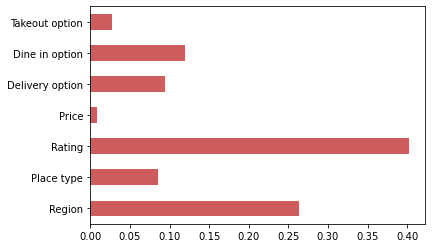

In [61]:
#3.

abr.feature_importances_

#converting to pandas series to visualize
Feat_importance=pd.Series(abr.feature_importances_ , index = X_train.columns)
Feat_importance.plot(kind = 'barh', color = 'indianred')
plt.show()

# Regularization

In [62]:
# Instantiate AdaBoostRegressor
abr = AdaBoostRegressor(random_state = 42)

# Hyper-parameters to search
hyperparam_grid = {'n_estimators':[10,50,100,200],
                   'learning_rate': [0.01, 0.1, 1.0], # learning rate
                  }

#Perform randomized search on the data with cross validation
random_searchcv = RandomizedSearchCV(abr, hyperparam_grid, cv = 5, scoring = 'neg_mean_squared_error', random_state = 42)
random_searchcv.fit(X_train, y_train)

#identify the best hyperparameters found after the randomized grid search
best_parameters = random_searchcv.best_params_

# use the best hyperparameter retrieved to train the model
abr_pruned = random_searchcv.best_estimator_

#Make prediction
y_prediction_abr_pruned = abr_pruned.predict(X_test)

#Evaluate model performance
mse_abr_pruned = mean_squared_error(y_test, y_prediction_abr_pruned)


#print results
print(f"The best hyper-parameters for this data is {best_parameters}")
print(f"The mean squared error gotten after evaluating model's performance is {mse_abr_pruned}")

The best hyper-parameters for this data is {'n_estimators': 100, 'learning_rate': 0.01}
The mean squared error gotten after evaluating model's performance is 1.3019696928790778


# GradientBoostingRegressor



In [63]:
#1.

# instantiate model

gbr = GradientBoostingRegressor(random_state = 42)
gbr.fit(X_train, y_train)
y_pred_gbr = gbr.predict(X_test)


In [64]:
mse_gbr = mean_squared_error(y_test, y_pred_gbr)

#validate the mean squared error of the model
mse_scores_gbr = -cross_val_score(gbr, X_train, y_train, scoring = 'neg_mean_squared_error', cv = 5)
mean_mse_scores_gbr = mse_scores_gbr.mean()
std_mse_scores_gbr = mse_scores_gbr.std()

#print results
print(f"The mean squared error gotten after evaluating model's performance is {mse_gbr}")
print(f"The mean of mean squared errors gotten after performing the 5 fold cross validation is {mean_mse_scores_gbr}")
print(f"The standard deviation from the mean {mean_mse_scores_ls} is {std_mse_scores_gbr}")



The mean squared error gotten after evaluating model's performance is 1.0162651935665663
The mean of mean squared errors gotten after performing the 5 fold cross validation is 1.5710283973868897
The standard deviation from the mean 3.0124103196689123 is 0.3053149305432875


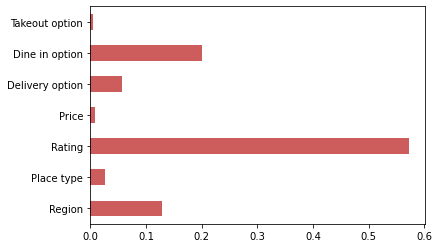

In [65]:
# 3.

gbr.feature_importances_

#converting to pandas series to visualize
Feat_importance=pd.Series(gbr.feature_importances_ , index = X_train.columns)
Feat_importance.plot(kind = 'barh', color = 'indianred')
plt.show()

# Regularization 

In [66]:
# Instantiate RandomForestRegressor
gbr = GradientBoostingRegressor(random_state = 42)

# Hyper-parameters to search
hyperparam_grid = {'n_estimators':[50,100, 200],
                   'max_depth': [None, 2, 5, 10, 15],
                  'learning_rate': [0.01,0.1, 1.0],
                   }

#Perform randomized search on the data with cross validation
random_searchcv = RandomizedSearchCV(gbr, hyperparam_grid, cv = 5, scoring = 'neg_mean_squared_error', random_state = 42)
random_searchcv.fit(X_train, y_train)

#identify the best hyperparameters found after the randomized grid search
best_parameters = random_searchcv.best_params_

# use the best hyperparameter retrieved to train the model
gbr_pruned = random_searchcv.best_estimator_

#Make prediction
y_prediction_gbr_pruned = gbr_pruned.predict(X_test)

#Evaluate model performance
mse_gbr_pruned = mean_squared_error(y_test, y_prediction_gbr_pruned)


#print results
print(f"The best hyper-parameters for this data is {best_parameters}")
print(f"The mean squared error gotten after evaluating model's performance is {mse_gbr_pruned}")

The best hyper-parameters for this data is {'n_estimators': 200, 'max_depth': 5, 'learning_rate': 0.01}
The mean squared error gotten after evaluating model's performance is 1.0745194357134102


# xgboost 


In [67]:
# instantiate model

xgbr = xgb.XGBRegressor(random_state = 42)
xgbr.fit(X_train, y_train)
y_pred_xgbr = xgbr.predict(X_test)


In [68]:
mse_xgbr = mean_squared_error(y_test, y_pred_xgbr)

#validate the mean squared error of the model
mse_scores_xgbr = -cross_val_score(xgbr, X_train, y_train, scoring = 'neg_mean_squared_error', cv = 5)
mean_mse_scores_xgbr = mse_scores_xgbr.mean()
std_mse_scores_xgbr = mse_scores_xgbr.std()

#print results
print(f"The mean squared error gotten after evaluating model's performance is {mse_xgbr}")
print(f"The mean of mean squared errors gotten after performing the 5 fold cross validation is {mean_mse_scores_xgbr}")
print(f"The standard deviation from the mean {mean_mse_scores_xgbr} is {std_mse_scores_xgbr}")



The mean squared error gotten after evaluating model's performance is 1.0382381102928255
The mean of mean squared errors gotten after performing the 5 fold cross validation is 1.512292073149553
The standard deviation from the mean 1.512292073149553 is 0.3244234044378367


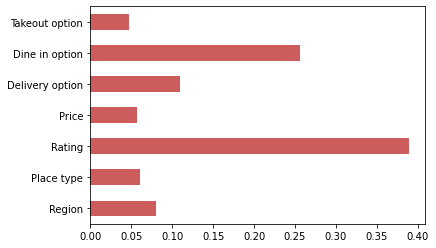

In [69]:
xgbr.feature_importances_

#converting to pandas series to visualize
Feat_importance=pd.Series(xgbr.feature_importances_ , index = X_train.columns)
Feat_importance.plot(kind = 'barh', color = 'indianred')
plt.show()

# Regularization

In [70]:
# Instantiate RandomForestRegressor
xgbr = xgb.XGBRegressor(random_state = 42)

# Hyper-parameters to search
hyperparam_grid = {'n_estimators':[50,100, 200],
                   'max_depth': [None, 2, 5, 10, 15],
                  'learning_rate': [0.01,0.1, 1.0],
                   }

#Perform randomized search on the data with cross validation
random_searchcv = RandomizedSearchCV(xgbr, hyperparam_grid, cv = 5, scoring = 'neg_mean_squared_error', random_state = 42)
random_searchcv.fit(X_train, y_train)

#identify the best hyperparameters found after the randomized grid search
best_parameters = random_searchcv.best_params_

# use the best hyperparameter retrieved to train the model
xgbr_pruned = random_searchcv.best_estimator_

#Make prediction
y_prediction_xgbr_pruned = xgbr_pruned.predict(X_test)

#Evaluate model performance
mse_xgbr_pruned = mean_squared_error(y_test, y_prediction_xgbr_pruned)


#print results
print(f"The best hyper-parameters for this data is {best_parameters}")
print(f"The mean squared error gotten after evaluating model's performance is {mse_xgbr_pruned}")

The best hyper-parameters for this data is {'n_estimators': 100, 'max_depth': 10, 'learning_rate': 0.1}
The mean squared error gotten after evaluating model's performance is 0.9315679974235515


# PREPARE DATA FOR LIGHTGBM AND FOR CATBOOST

In [71]:
# exclude outliers

train_data_c = train_data_c[train_data_c['Reviews'] != 17500]

#reset index to ensure continuous row index
train_data_c = train_data_c.reset_index(drop = True )

test_data_c = test_data_c[test_data_c['Reviews'] != 17500]

#reset index to ensure continuous row index
test_data_c = test_data_c.reset_index(drop = True )

# drop column that won't be useful

train_data_c.drop('Place name', axis = 1, inplace = True)
test_data_c.drop('Place name', axis = 1, inplace = True)

# split into feature and target
train_data_c['Log_reviews'] = np.log(train_data['Reviews'] + 1) #adding 1 to avoid log 0

test_data_c['Log_reviews'] = np.log(test_data['Reviews'] + 1) #adding 1 to avoid log 0

y_train_c = np.array(train_data_c['Log_reviews']).reshape(-1, 1)
X_train_c = train_data_c.drop(['Reviews', 'Log_reviews'], axis = 1)

y_test_c = np.array(test_data_c['Log_reviews']).reshape(-1, 1)
X_test_c = test_data_c.drop(['Reviews', 'Log_reviews'], axis = 1)




# LIGHTGBM

 

In [72]:
# Convert object data type to categorical in train set

for col in X_train_c.select_dtypes(include = ['object']):
    X_train_c[col] = X_train_c[col].astype('category')

In [73]:
# Convert object data type to categorical in test set

for col in X_test_c.select_dtypes(include = ['object']):
    X_test_c[col] = X_test_c[col].astype('category')

In [74]:
# instantiate model

lgbm = lgb.LGBMRegressor(random_state = 42)

#train and make prediction

lgbm.fit(X_train_c, y_train_c)
y_pred_lgbm = lgbm.predict(X_test_c)

In [75]:
mse_lgbm = mean_squared_error(y_test, y_pred_lgbm)

#validate the mean squared error of the model
mse_scores_lgbm = -cross_val_score(lgbm, X_train, y_train, scoring = 'neg_mean_squared_error', cv = 5)
mean_mse_scores_lgbm = mse_scores_lgbm.mean()
std_mse_scores_lgbm = mse_scores_lgbm.std()

#print results
print(f"The mean squared error gotten after evaluating model's performance is {mse_lgbm}")
print(f"The mean of mean squared errors gotten after performing the 5 fold cross validation is {mean_mse_scores_lgbm}")
print(f"The standard deviation from the mean {mean_mse_scores_ls} is {std_mse_scores_lgbm}")



The mean squared error gotten after evaluating model's performance is 1.5063138521306938
The mean of mean squared errors gotten after performing the 5 fold cross validation is 1.3761990445587586
The standard deviation from the mean 3.0124103196689123 is 0.47568365695909287


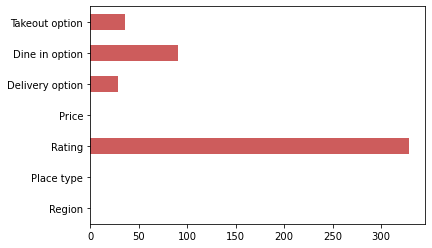

In [76]:
# 3.

lgbm.feature_importances_

#converting to pandas series to visualize
Feat_importance=pd.Series(lgbm.feature_importances_ , index = X_train_c.columns)
Feat_importance.plot(kind = 'barh', color = 'indianred')
plt.show()

# Regularization

In [77]:
# Instantiate LGBMRegressor
lgbm = lgb.LGBMRegressor(random_state = 42)

# Hyper-parameters to search
hyperparam_grid = {'n_estimators':[50,100, 200],
                   'max_depth': [None, 2, 5, 7, 10],
                  'learning_rate': [0.01,0.1, 1.0],
                   'num_leaves': [15, 31, 63],
                  }

#Perform randomized search on the data with cross validation
random_searchcv = RandomizedSearchCV(lgbm, hyperparam_grid, cv = 5, scoring = 'neg_mean_squared_error', random_state = 42)
random_searchcv.fit(X_train_c, y_train_c)

#identify the best hyperparameters found after the randomized grid search
best_parameters = random_searchcv.best_params_

# use the best hyperparameter retrieved to train the model
lgbm_pruned = random_searchcv.best_estimator_

#Make prediction
y_prediction_lgbm_pruned = lgbm_pruned.predict(X_test_c)

#Evaluate model performance
mse_lgbm_pruned = mean_squared_error(y_test_c, y_prediction_lgbm_pruned)


#print results
print(f"The best hyper-parameters for this data is {best_parameters}")
print(f"The mean squared error gotten after evaluating model's performance is {mse_lgbm_pruned}")

The best hyper-parameters for this data is {'num_leaves': 31, 'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.1}
The mean squared error gotten after evaluating model's performance is 1.5063138521306938


# CATBOOST REGRESSOR



In [78]:
# instantiate model
cat_model = CatBoostRegressor(cat_features = ['Region','Place type','Price','Dine in option','Takeout option', 'Delivery option'], random_state = 42)

# train model and make prediction
cat_model.fit(X_train_c, y_train_c)
y_pred_cat = cat_model.predict(X_test_c)

Learning rate set to 0.03065
0:	learn: 1.6824944	total: 159ms	remaining: 2m 38s
1:	learn: 1.6680452	total: 165ms	remaining: 1m 22s
2:	learn: 1.6471779	total: 184ms	remaining: 1m 1s
3:	learn: 1.6247298	total: 198ms	remaining: 49.2s
4:	learn: 1.6088944	total: 219ms	remaining: 43.5s
5:	learn: 1.5895221	total: 236ms	remaining: 39s
6:	learn: 1.5695118	total: 246ms	remaining: 34.9s
7:	learn: 1.5508639	total: 260ms	remaining: 32.2s
8:	learn: 1.5339726	total: 276ms	remaining: 30.4s
9:	learn: 1.5234147	total: 282ms	remaining: 27.9s
10:	learn: 1.5060213	total: 295ms	remaining: 26.5s
11:	learn: 1.4877958	total: 310ms	remaining: 25.5s
12:	learn: 1.4744916	total: 326ms	remaining: 24.8s
13:	learn: 1.4602408	total: 342ms	remaining: 24.1s
14:	learn: 1.4439315	total: 359ms	remaining: 23.6s
15:	learn: 1.4299438	total: 369ms	remaining: 22.7s
16:	learn: 1.4171952	total: 392ms	remaining: 22.7s
17:	learn: 1.4056293	total: 410ms	remaining: 22.4s
18:	learn: 1.3938903	total: 419ms	remaining: 21.6s
19:	learn: 1

In [79]:
mse_cat = mean_squared_error(y_test, y_pred_cat)

#validate the mean squared error of the model
mse_scores_cat = -cross_val_score(cat_model, X_train, y_train, scoring = 'neg_mean_squared_error', cv = 5)
mean_mse_scores_cat = mse_scores_cat.mean()
std_mse_scores_cat = mse_scores_cat.std()

#print results
print(f"The mean squared error gotten after evaluating model's performance is {mse_cat}")
print(f"The mean of mean squared errors gotten after performing the 5 fold cross validation is {mean_mse_scores_cat}")
print(f"The standard deviation from the mean {mean_mse_scores_ls} is {std_mse_scores_cat}")



Learning rate set to 0.029588
0:	learn: 1.6790378	total: 14.9ms	remaining: 14.9s
1:	learn: 1.6552647	total: 22.9ms	remaining: 11.4s
2:	learn: 1.6357426	total: 36ms	remaining: 12s
3:	learn: 1.6136593	total: 46.7ms	remaining: 11.6s
4:	learn: 1.5940969	total: 59.6ms	remaining: 11.8s
5:	learn: 1.5763715	total: 72.5ms	remaining: 12s
6:	learn: 1.5575325	total: 91.3ms	remaining: 12.9s
7:	learn: 1.5389624	total: 107ms	remaining: 13.3s
8:	learn: 1.5196925	total: 123ms	remaining: 13.6s
9:	learn: 1.5062355	total: 139ms	remaining: 13.8s
10:	learn: 1.4923382	total: 149ms	remaining: 13.4s
11:	learn: 1.4819778	total: 157ms	remaining: 12.9s
12:	learn: 1.4673330	total: 173ms	remaining: 13.1s
13:	learn: 1.4550764	total: 200ms	remaining: 14.1s
14:	learn: 1.4434214	total: 208ms	remaining: 13.6s
15:	learn: 1.4342477	total: 214ms	remaining: 13.1s
16:	learn: 1.4256444	total: 222ms	remaining: 12.8s
17:	learn: 1.4128453	total: 235ms	remaining: 12.8s
18:	learn: 1.3984106	total: 248ms	remaining: 12.8s
19:	learn:

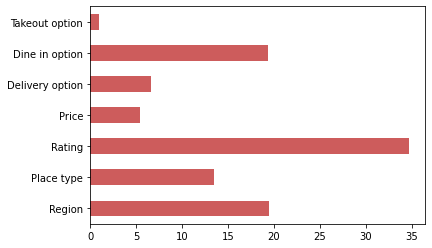

In [80]:
# 3.

cat_model.feature_importances_

#converting to pandas series to visualize
Feat_importance=pd.Series(cat_model.feature_importances_ , index = X_train_c.columns)
Feat_importance.plot(kind = 'barh', color = 'indianred')
plt.show()

# Regularization

In [81]:
# Instantiate CatBoostRegressor
cat_model = CatBoostRegressor(cat_features = ['Region','Place type','Price','Dine in option','Takeout option', 'Delivery option'], random_state = 42)

# Hyper-parameters to search
hyperparam_grid = {'n_estimators':[50,100, 200],
                   'max_depth': [None, 2, 5, 7, 10],
                  'learning_rate': [0.01,0.1, 1.0],
                   'num_leaves': [15, 31, 63]
                  }

#Perform randomized search on the data with cross validation
random_searchcv = RandomizedSearchCV(cat_model, hyperparam_grid, cv = 5, scoring = 'neg_mean_squared_error', random_state = 42)
random_searchcv.fit(X_train, y_train)

#identify the best hyperparameters found after the randomized grid search
best_parameters = random_searchcv.best_params_

# use the best hyperparameter retrieved to train the model
cat_model_pruned = random_searchcv.best_estimator_

#Make prediction
y_prediction_cat_model_pruned = cat_model_pruned.predict(X_test)

#Evaluate model performance
mse_cat_model_pruned = mean_squared_error(y_test, y_prediction_cat_model_pruned)


#print results
print(f"The best hyper-parameters for this data is {best_parameters}")
print(f"The mean squared error gotten after evaluating model's performance is {mse_cat_model_pruned}")

0:	learn: 1.6232509	total: 10.6ms	remaining: 1.05s
1:	learn: 1.5609724	total: 22.4ms	remaining: 1.1s
2:	learn: 1.4955808	total: 34.3ms	remaining: 1.11s
3:	learn: 1.4324485	total: 45.9ms	remaining: 1.1s
4:	learn: 1.3820037	total: 57.6ms	remaining: 1.09s
5:	learn: 1.3321005	total: 69ms	remaining: 1.08s
6:	learn: 1.2944938	total: 80.4ms	remaining: 1.07s
7:	learn: 1.2610387	total: 90ms	remaining: 1.03s
8:	learn: 1.2309041	total: 99.4ms	remaining: 1s
9:	learn: 1.2101237	total: 111ms	remaining: 999ms
10:	learn: 1.1925726	total: 121ms	remaining: 975ms
11:	learn: 1.1682714	total: 132ms	remaining: 970ms
12:	learn: 1.1507888	total: 144ms	remaining: 962ms
13:	learn: 1.1345003	total: 155ms	remaining: 954ms
14:	learn: 1.1191847	total: 167ms	remaining: 947ms
15:	learn: 1.1010934	total: 179ms	remaining: 938ms
16:	learn: 1.0880236	total: 190ms	remaining: 928ms
17:	learn: 1.0726893	total: 207ms	remaining: 942ms
18:	learn: 1.0585920	total: 221ms	remaining: 942ms
19:	learn: 1.0458984	total: 234ms	remaini